In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [3]:
house_data_df = pd.read_csv("kc_house_data.csv.zip")

In [4]:
house_data_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [15]:
x = house_data_df["sqft_living"]
y = house_data_df["price"]

In [23]:
x

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64

In [24]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [31]:
x = x.values.reshape(-1,1)

In [32]:
x

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [39]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 40)

In [42]:
model = LinearRegression()

In [43]:
model.fit(x_train, y_train)

LinearRegression()

In [44]:
model.score(x_train , y_train)

0.49036986182236686

In [45]:
pred = model.predict(x_test) #we are predicting the trained model with the actual values of the features(sqft_living)

In [46]:
pred #this are the predictions for the house prices 

array([1034365.90370503,  729325.07820192,  492071.10281061, ...,
        415810.89643483,  839478.7096336 ,  308481.71709114])

In [47]:
model.coef_ #this means that for every single increase in the squarefoot of the living room, the price of the house 
#will increase by 282.4452088 dollar.

array([282.4452088])

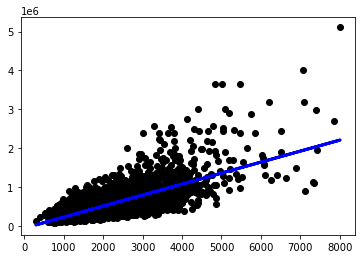

In [74]:
plt.scatter(x_test, y_test, color = "black")
plt.plot(x_test, pred, color= "blue", lw = 3)

In [51]:
from sklearn import metrics

In [52]:
metrics.mean_squared_error(y_test, pred)

62451720102.954

In [53]:
np.sqrt(metrics.mean_squared_error(y_test, pred)) #to get the root mean squared error.

249903.4215511144